## Maulidio Farhan Rizkullah
### 2141720041
### 19
### 3F

In [4]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
from keras.datasets import mnist

data = mnist.load_data()

11490434/11490434 [==============================] - 23s 2us/step


In [6]:
(X_train, y_train), (X_test, y_test) = data

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Data Preprocessing

In [7]:
# Melakukan reshape data dari 3D menjadi 2D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [8]:
# melakukan penskalaan fitur
from sklearn.preprocessing import MinMaxScaler # import library MinMaxScaler dari sklearn.preprocessing

# membuat objek MinMaxScaler
minmax = MinMaxScaler()

# fit dan transfrom training data
X_train = minmax.fit_transform(X_train)

# transfrom test data
X_test = minmax.transform(X_test)

print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


### Menampilkan data

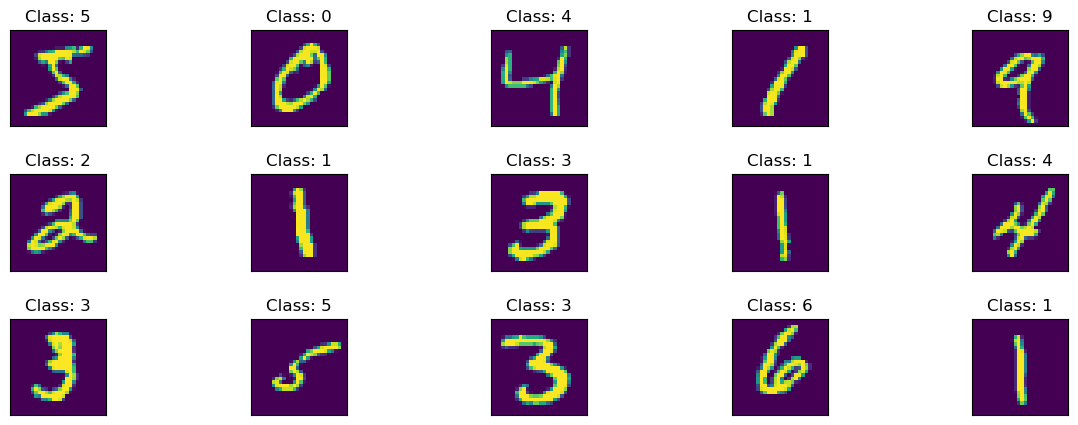

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(15):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].axes.get_yaxis().set_visible(False)
                 
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

### Membuat model ANN

In [14]:
# Membuat objek model Sequential
ann = tf.keras.models.Sequential()

In [15]:
# Menambahkan input layer
ann.add(tf.keras.layers.Dense(units=784, activation='relu', input_shape=(784,)))

# Menambahkan hidden layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Menambahkan output layer
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [16]:
# Mengkompilasi model dengan optimizer, loss function, dan metrik
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
ann.fit(X_train, y_train, epochs=100, batch_size = 100)

Epoch 1/100
600/600 [==============================] - 10s 17ms/step - loss: 3.9736e-11 - accuracy: 1.0000
Epoch 2/100
600/600 [==============================] - 10s 17ms/step - loss: 4.1723e-11 - accuracy: 1.0000
Epoch 3/100
600/600 [==============================] - 10s 17ms/step - loss: 3.3776e-11 - accuracy: 1.0000
Epoch 4/100
600/600 [==============================] - 10s 17ms/step - loss: 2.9802e-11 - accuracy: 1.0000
Epoch 5/100
600/600 [==============================] - 10s 17ms/step - loss: 2.9802e-11 - accuracy: 1.0000
Epoch 6/100
600/600 [==============================] - 10s 16ms/step - loss: 2.9802e-11 - accuracy: 1.0000
Epoch 7/100
600/600 [==============================] - 9s 16ms/step - loss: 2.3842e-11 - accuracy: 1.0000
Epoch 8/100
600/600 [==============================] - 10s 16ms/step - loss: 2.3842e-11 - accuracy: 1.0000
Epoch 9/100
600/600 [==============================] - 10s 17ms/step - loss: 1.9868e-11 - accuracy: 1.0000
Epoch 10/100
600/600 [================

### Evaluasi ANN Model

In [24]:

# Melakukan evaluasi model
from sklearn.metrics import f1_score, roc_auc_score
import pandas as pd


loss, acc = ann.evaluate(X_test, y_test)

print(loss)
print(acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3364 - accuracy: 0.9858
0.33643096685409546
0.98580002784729


### Membuat Prediksi

In [ ]:
import numpy as np

pred = ann.predict(X_test)

pred_labels = np.argmax(pred, axis = -1)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, pred_labels)
conf = confusion_matrix(y_test, pred_labels)
print(acc)
print(conf)

0.9858
[[ 973    0    0    0    1    1    3    0    0    2]
 [   0 1128    0    1    0    1    1    1    3    0]
 [   0    0 1016    4    2    0    1    4    4    1]
 [   0    0    4  993    0    3    0    3    5    2]
 [   0    0    1    0  967    0    5    0    1    8]
 [   1    0    0    6    0  878    3    0    2    2]
 [   2    2    0    1    3    2  947    0    1    0]
 [   1    3    8    0    1    0    0 1007    2    6]
 [   1    0    1    1    6    1    1    2  957    4]
 [   2    2    1    3    5    3    0    1    0  992]]


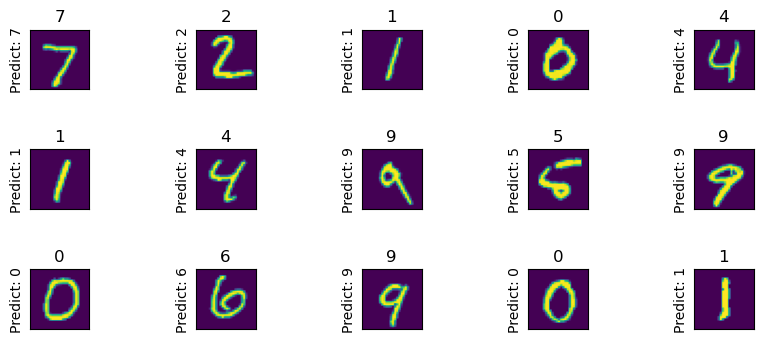

In [31]:
def Label_Predict(xtest, ytest, ypred):
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(wspace=0.5, hspace=1)
    for i, (img, y) in enumerate(zip(xtest[:15].reshape(15, 28, 28), ytest[:15])):
        
        if ytest[i] == ypred[i]:
            text_color = 'black'
        else:
            text_color = 'red'
        
        plt.subplot(5, 5, 1 + i)
        plt.imshow(img)
        plt.ylabel(f"Predict: {ytest[i]}", color = text_color)
        plt.title(f"{ypred[i]}")
        plt.xticks([])
        plt.yticks([])
        
Label_Predict(X_test, y_test, pred_labels)


### Kesimpulan

- Dari hasil yang telah di dapatkan diatas, akurasi model ANN sudah sangat bagus mencapai 0.9858, pada confusion matrix juga menunjukkan bahwa data yang diprediksi memiliki ketepatan yang besar dilihat dari jumlah sisi diagonal matrix yang angka nya lebih besar dibandingkan diluar diagonal. 

- Berikut adalah konfigurasi model ANN yang digunakan untuk memproses dataset MNIST
    - Pada proses preprocessing, saya melakukan reshape dari 3D array menjadi 2D array, yang selanjutnya dilakukan penskalaan fitur menggunakan MinMaxScaler.
    - Pada proses membuat model ANN, saya menggunakan 4 layer yang terdiri dari 1 input layer menggunakan 'relu', 2 hidden layer menggunakan 'relu', dan 1 output layer menggunakan 'softmax' dengan 10 units untuk menampung hasil 10 label, yang selanjutnya dicompile sama seperti praktikum sebelumnya tetapi disini saya menggunakan loss function 'sparse_categorical_crossentropy'. Pada fit model, saya menggunakan epoch 100 dengan batch size 100.
    - Pada hasil evaluasi didapatkan hasil akurasi model ANN mencapai 0.9858 yang artinya tingkat akurasi sudah sangat baik